<a href="https://colab.research.google.com/github/salarMokhtariL/American-Sign-Language-MNIST-Gesture-Recognition-CNN/blob/main/American_Sign_Language_MNIST_%26_Gesture_Recongition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American Sign Language MNIST & Gesture Recongition CNN

> By Salar Moktari Laleh

# Importing Required Libraries
importing necessary libraries for data cleaning, preprocessing, and model building.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.patheffects as path_effects

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import cv2
from google.colab.patches import cv2_imshow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Loading the Dataset

load the train and test datasets using Pandas.



In [2]:
# Train datasets

train = pd.read_csv("https://github.com/salarMokhtariL/American-Sign-Language-MNIST-Gesture-Recognition-CNN/raw/main/Dataset/sign_mnist_train.csv")

# Test datasets

test = pd.read_csv("https://raw.githubusercontent.com/salarMokhtariL/American-Sign-Language-MNIST-Gesture-Recognition-CNN/main/Dataset/sign_mnist_test.csv")

In [3]:
# Training datasets

train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# Get training labels

labels = train['label'].values

In [5]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

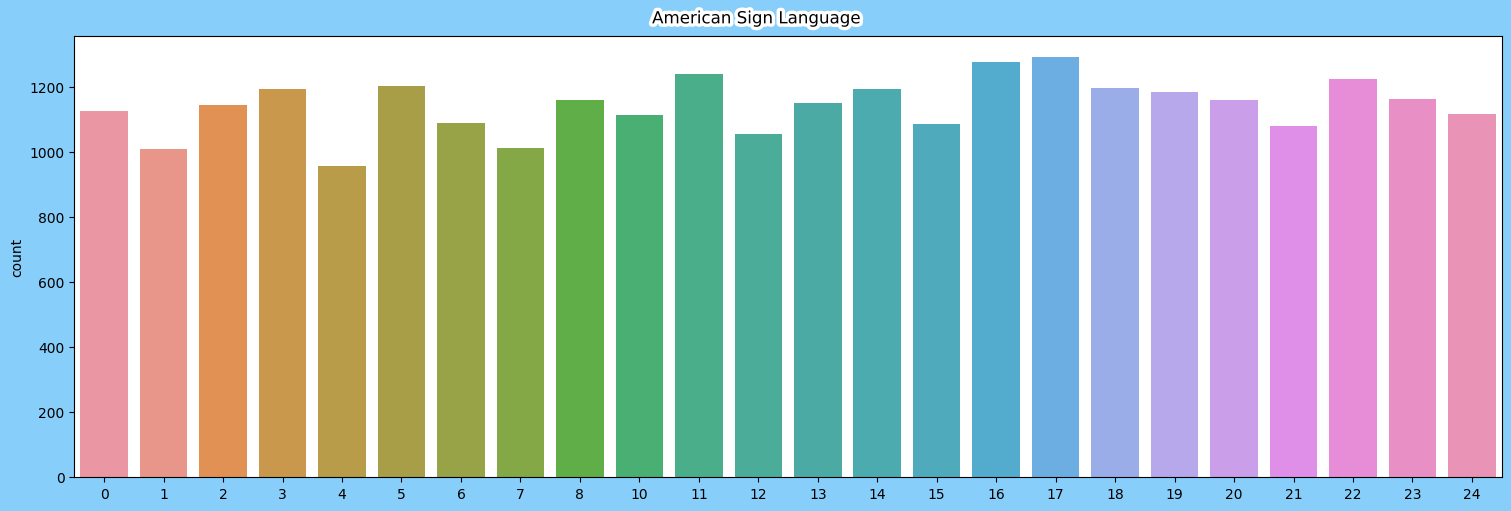

In [6]:
# Plot

plt.figure(figsize = (15,5), facecolor='lightskyblue', layout='constrained', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()] )
sns.countplot(x = labels)

plt.suptitle('American Sign Language').set_path_effects([path_effects.Stroke(linewidth=5, foreground='white'),
                       path_effects.Normal()])

In [7]:
# Drop traing labels from dataset for separate it

train.drop('label', axis = 1, inplace = True)

In [8]:
# Extract image data from each row in datasets

images = train.values
images = np.array([np.reshape(i, (28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [9]:
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


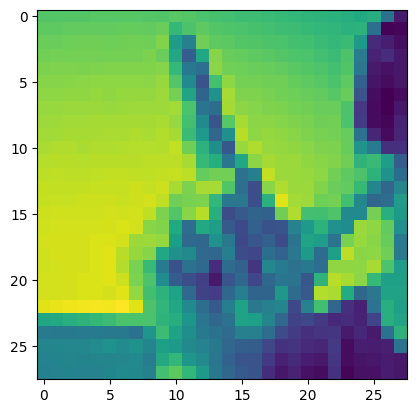

In [11]:
# Inspect an image

index = 40
print(labels[index])
plt.imshow(images[index].reshape(28,28))

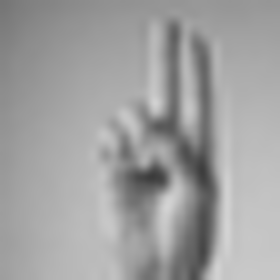

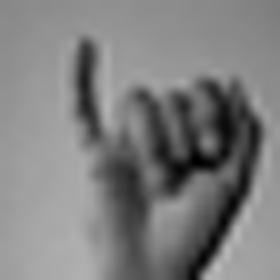

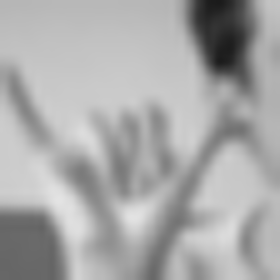

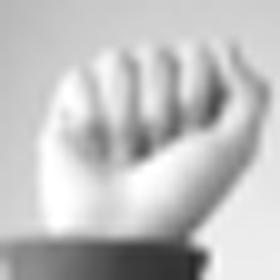

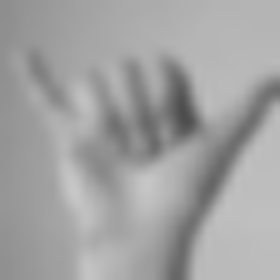

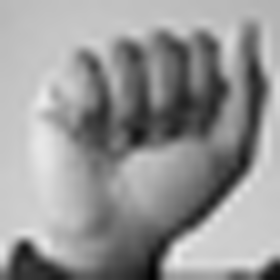

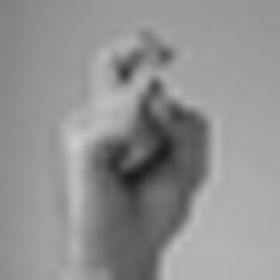

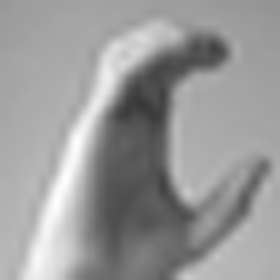

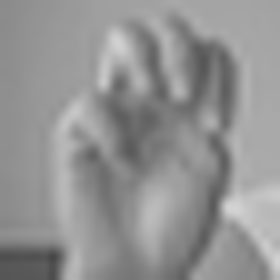

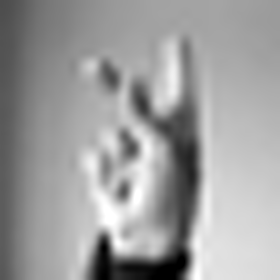

In [12]:
# Using OpenCV to view random images from dataset

for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10,
                        interpolation=cv2.INTER_CUBIC)
    cv2_imshow(sample)


In [13]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3,
                                                    random_state=101)

In [14]:
# Strart loading tensorflow modules
# define batch size

batch_size = 128
num_classes = 24
epochs = 10

In [15]:
# Scale images

x_train = x_train/255
x_test = x_test/255

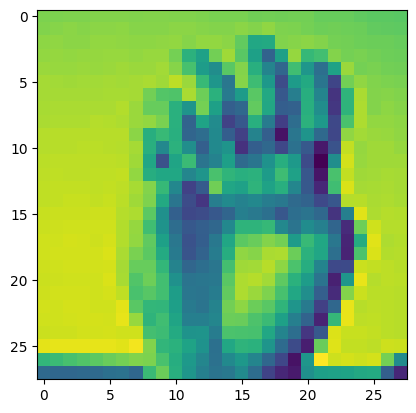

In [16]:
# Reshape into the size required by TF & Keras

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[5].reshape(28,28))

In [17]:
# CNN model

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

In [18]:
# Compile Model

model.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [20]:
# Train Model

history = model.fit(x_train, y_train, validation_data= (x_test, y_test),
                    epochs=epochs, batch_size= batch_size )

Epoch 1/10
151/151 [==============================] - 33s 210ms/step - loss: 2.5890 - accuracy: 0.2058 - val_loss: 1.6030 - val_accuracy: 0.4957
Epoch 2/10
151/151 [==============================] - 49s 325ms/step - loss: 1.2758 - accuracy: 0.5753 - val_loss: 0.8474 - val_accuracy: 0.7478
Epoch 3/10
151/151 [==============================] - 31s 203ms/step - loss: 0.7702 - accuracy: 0.7367 - val_loss: 0.5179 - val_accuracy: 0.8300
Epoch 4/10
151/151 [==============================] - 26s 171ms/step - loss: 0.5207 - accuracy: 0.8190 - val_loss: 0.3295 - val_accuracy: 0.8975
Epoch 5/10
151/151 [==============================] - 40s 264ms/step - loss: 0.3332 - accuracy: 0.8891 - val_loss: 0.2236 - val_accuracy: 0.9275
Epoch 6/10
151/151 [==============================] - 43s 284ms/step - loss: 0.2452 - accuracy: 0.9173 - val_loss: 0.1762 - val_accuracy: 0.9394
Epoch 7/10
151/151 [==============================] - 45s 297ms/step - loss: 0.1735 - accuracy: 0.9440 - val_loss: 0.1213 - val_ac

In [21]:
# Save Model

model.save('sign_mnist_cnn_50_Epochs.h5')
print("saved")

saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


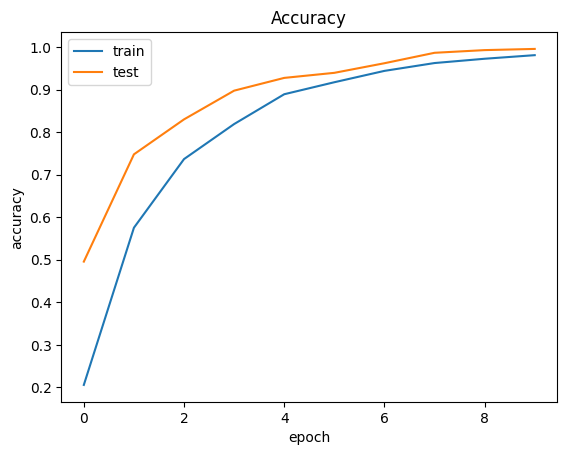

In [22]:
# Training history graphically

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

In [ ]:
# Reshape test data for evaluate it's performance on unseen data

test_labels = test['label']
test.drop('label', axis=1, inplace=True)

test_images= test.values
test_images= np.array([np.reshape(i, (28,28)) for i in test_images])
test_images= np.array([i.flatten() for i in test_])